In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('All_Comments_Final.csv')

In [77]:
df.head()

,Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
0,Thanks for this video Ken.\n\nI decided to go ...,UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22T08:13:29Z,xpIFS6jZbe8,user_981
1,Hello ken jee!!! I'm doing a graduation on Com...,Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22T01:09:46Z,xpIFS6jZbe8,user_213
2,"Thanks for this video, man. So useful. I'll me...",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21T23:59:05Z,rEWPqw6rMGI,user_1065
3,Great video!!! I started learning Python 8 mon...,UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21T23:00:37Z,xpIFS6jZbe8,user_3391
4,Been watching hours of your material (and Tina...,UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21T20:24:20Z,sHRq-LshG3U,user_2816


In [78]:
df.columns

Index(['Comments', 'Comment_ID', 'Reply_Count', 'Like_Count', 'Date', 'VidId',
       'user_ID'],
      dtype='object')

In [79]:
df = df[["Comments"]]
df.isnull().sum()
df.dropna(inplace=True)
df.describe()

,Comments
count,10239
unique,10135
top,I like it!
freq,12


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [82]:
import nltk
from nltk.corpus import stopwords
import string
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [83]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    return text

In [84]:
df["Comments"] = df["Comments"].apply(clean)

In [85]:
df.head()

,Comments
0,thanks video keni decided go tech learning we...
1,hello ken jee im graduation computer science r...
2,thanks video man useful ill meet im senior lea...
3,great video started learning python months ag...
4,watching hours material tina know easy field i...


In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Comments"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Comments"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Comments"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["Comments"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [87]:
data = df[["Comments", "Positive", 
             "Negative", "Neutral","Compound"]]
data.head()

,Comments,Positive,Negative,Neutral,Compound
0,thanks video keni decided go tech learning we...,0.246,0.000,0.754,0.8860
1,hello ken jee im graduation computer science r...,0.330,0.000,0.670,0.9152
2,thanks video man useful ill meet im senior lea...,0.312,0.151,0.538,0.4588
3,great video started learning python months ag...,0.303,0.000,0.697,0.9313
4,watching hours material tina know easy field i...,0.333,0.000,0.667,0.8885


In [88]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

In [89]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3238.902000000018
Negative:  380.7550000000001
Neutral:  6577.3890000000065


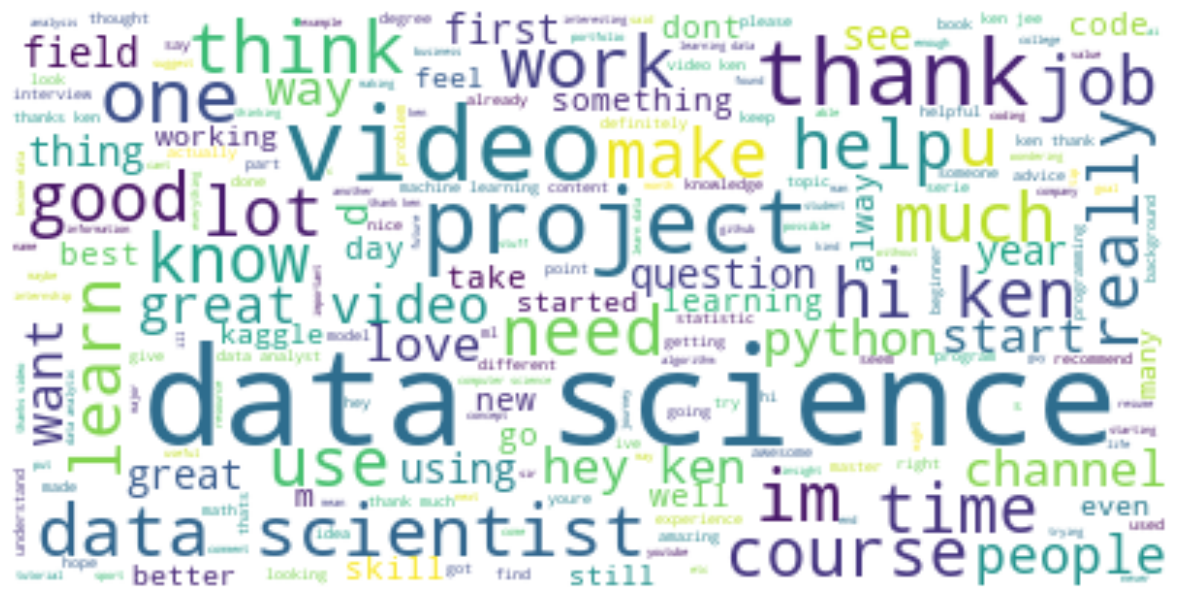

In [90]:
text = " ".join(i for i in data.Comments)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
data.head()

,Comments,Positive,Negative,Neutral,Compound
0,thanks video keni decided go tech learning we...,0.246,0.000,0.754,0.8860
1,hello ken jee im graduation computer science r...,0.330,0.000,0.670,0.9152
2,thanks video man useful ill meet im senior lea...,0.312,0.151,0.538,0.4588
3,great video started learning python months ag...,0.303,0.000,0.697,0.9313
4,watching hours material tina know easy field i...,0.333,0.000,0.667,0.8885


In [92]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,Comments,Positive,Negative,Neutral,Compound,Sentiment
0,thanks video keni decided go tech learning we...,0.246,0.000,0.754,0.8860,Positive
1,hello ken jee im graduation computer science r...,0.330,0.000,0.670,0.9152,Positive
2,thanks video man useful ill meet im senior lea...,0.312,0.151,0.538,0.4588,Positive
3,great video started learning python months ag...,0.303,0.000,0.697,0.9313,Positive
4,watching hours material tina know easy field i...,0.333,0.000,0.667,0.8885,Positive


In [93]:
print(data["Sentiment"].value_counts())

Positive    7731
Neutral     1829
Negative     679
Name: Sentiment, dtype: int64


In [94]:
data.to_csv("new_data.csv")

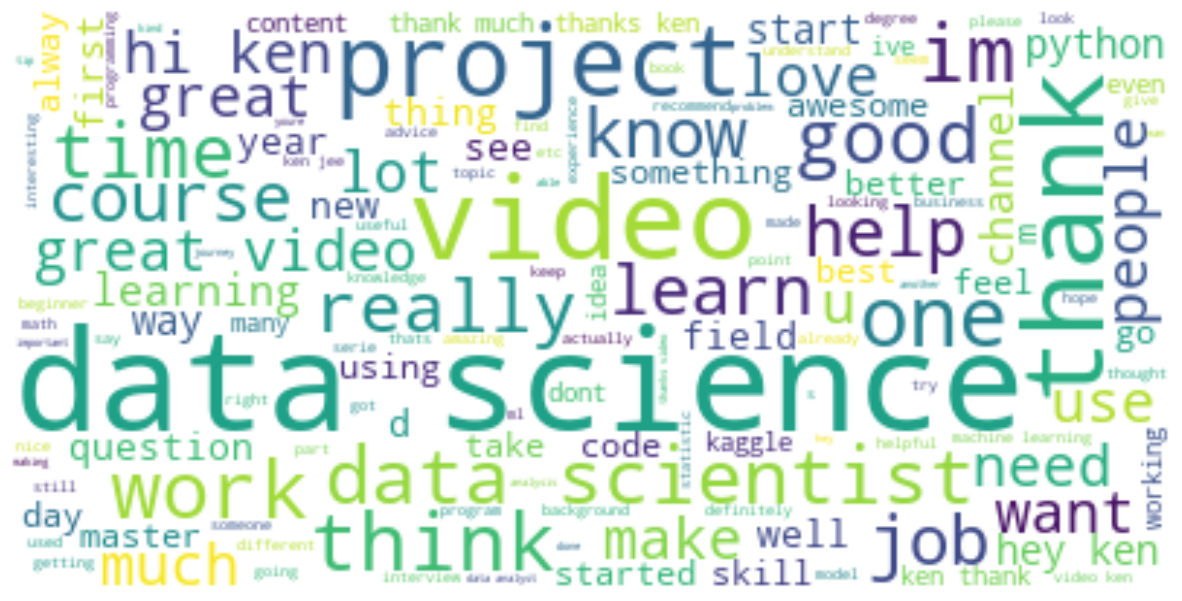

In [95]:
positive =' '.join([i for i in data['Comments'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

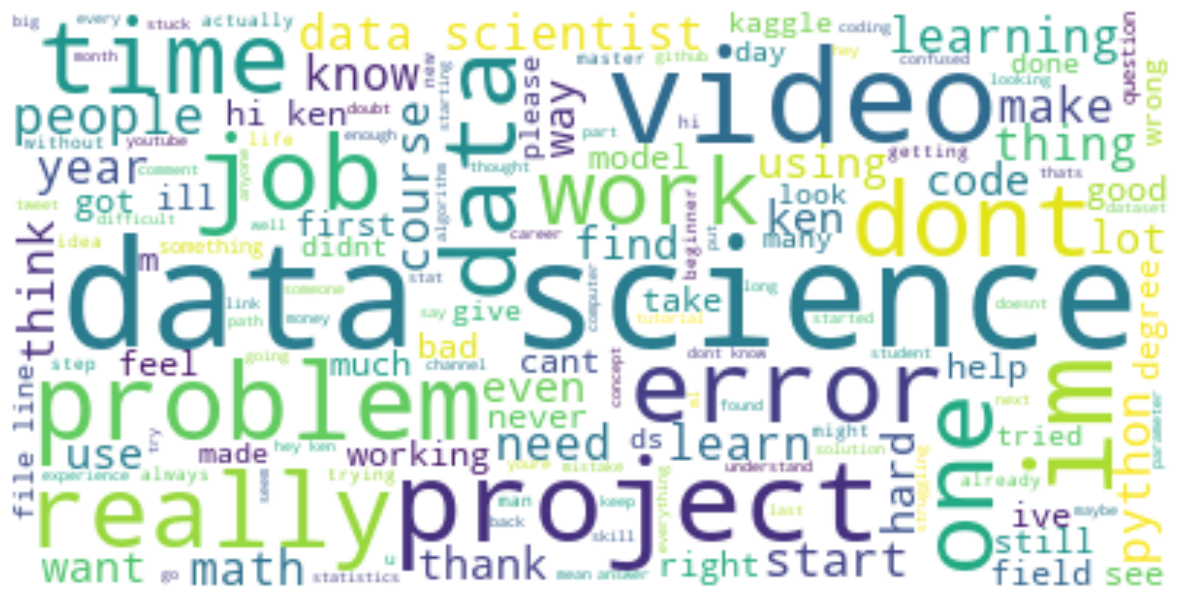

In [96]:
negative =' '.join([i for i in data['Comments'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

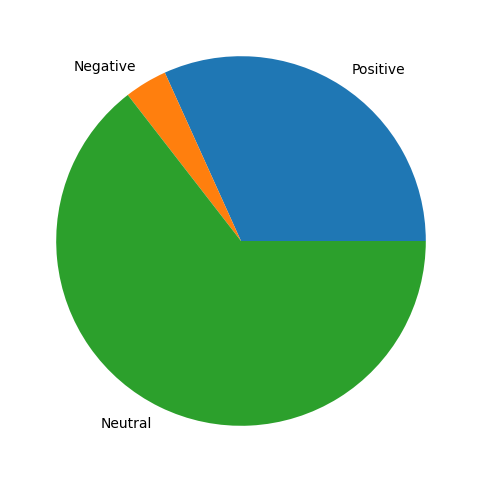

In [97]:
labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [x,y,z]

plt.figure(figsize=(10, 6))

# plotting pie chart
plt.pie(comment_counts, labels=labels)

# Displaying Pie Chart
plt.show()


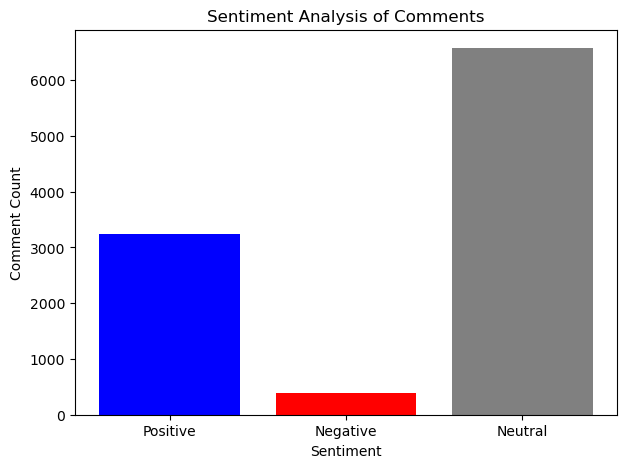

In [98]:
plt.figure(figsize=(7,5))
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])
plt.xlabel('Sentiment')
plt.ylabel('Comment Count')
plt.title('Sentiment Analysis of Comments')
plt.show()